### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data:

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64

 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score

### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [375]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Student_performance_data _.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [377]:
# Your code here
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])
dataset

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [378]:
# Your code here
dataset.isna().sum()

,0
Age,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0
Music,0
Volunteering,0


There's no null values.

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.

 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [379]:
# Your code here
X = dataset.drop(columns = 'GPA')
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = dataset['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(1913, 11)

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [380]:
# Your code here
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [381]:
# Your code here
model.compile(optimizer = 'adam', loss ='mse', metrics = ['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [382]:
# Your code here
history = model.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_split = 0.2)

Epoch 1/50
153/153 [==============================] - 1s 3ms/step - loss: 0.5677 - mae: 0.5323 - val_loss: 0.1355 - val_mae: 0.2955
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0955 - mae: 0.2464 - val_loss: 0.0803 - val_mae: 0.2295
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0671 - mae: 0.2084 - val_loss: 0.0663 - val_mae: 0.2085
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0549 - mae: 0.1878 - val_loss: 0.0570 - val_mae: 0.1904
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0483 - mae: 0.1765 - val_loss: 0.0520 - val_mae: 0.1828
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0432 - mae: 0.1667 - val_loss: 0.0516 - val_mae: 0.1804
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0408 - mae: 0.1611 - val_loss: 0.0453 - val_mae: 0.1681
Epoch 8/50
153/153 [==============================] - 0s 2ms/step - loss: 0.

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

In [383]:
X_epochs = np.arange(1,51)
y_loss = history.history['loss']
val_loss = history.history['val_loss']
mae_train = history.history['mae']
mae_val = history.history['val_mae']

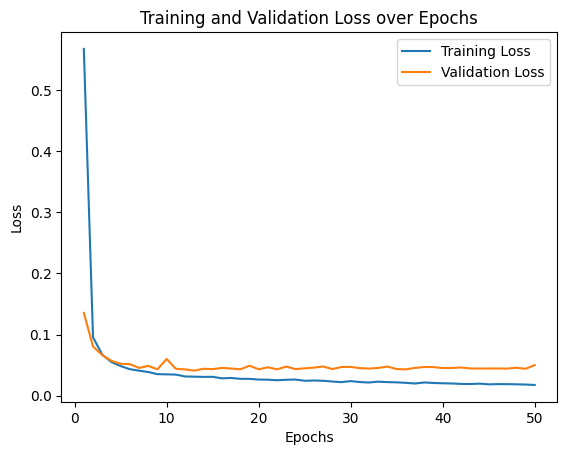

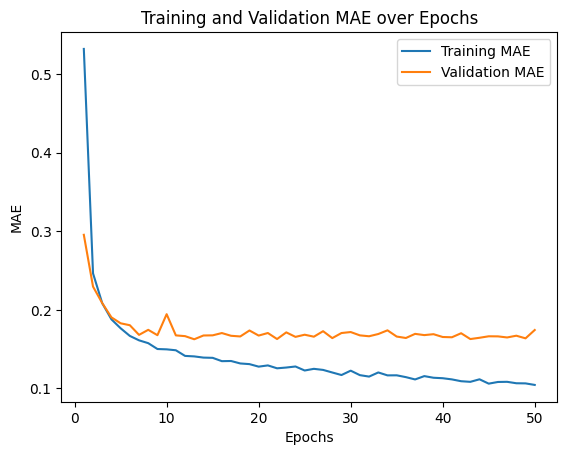

In [384]:
# Your code here
plt.plot(X_epochs, y_loss, label = 'Training Loss')
plt.plot(X_epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()


plt.plot(X_epochs, mae_train, label = 'Training MAE')
plt.plot(X_epochs, mae_val, label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE over Epochs')
plt.show()


### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [385]:
# Your code here
results = model.evaluate(X_test, y_test, batch_size= 32)
results

15/15 [==============================] - 0s 1ms/step - loss: 0.0479 - mae: 0.1708


[0.047880321741104126, 0.1707613319158554]

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [386]:
# Your code here
y_pred = model.predict(X_test)
for pred, actual in zip(y_pred, y_test):
    print(f"Predicted value: {pred}, Actual value: {actual}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R^2: {r2}")


15/15 [==============================] - 0s 1ms/step
Predicted value: [1.5037416], Actual value: 1.4277243762746905
Predicted value: [3.341662], Actual value: 3.117354434785501
Predicted value: [1.9174018], Actual value: 2.037768574636005
Predicted value: [3.450105], Actual value: 3.5485205508668662
Predicted value: [0.44754013], Actual value: 0.2489771312307257
Predicted value: [2.4196823], Actual value: 2.627693905554347
Predicted value: [1.743178], Actual value: 2.057378500596372
Predicted value: [2.068935], Actual value: 2.248337588471201
Predicted value: [2.1771376], Actual value: 2.1947065208246226
Predicted value: [0.8479413], Actual value: 0.7581829737450007
Predicted value: [2.734334], Actual value: 2.370893096932428
Predicted value: [0.80245364], Actual value: 0.7664048694920337
Predicted value: [2.8374107], Actual value: 2.952721567213245
Predicted value: [2.67286], Actual value: 2.3433313526833226
Predicted value: [2.766278], Actual value: 2.7718106588704914
Predicted value

As we can see, our MSE value is very low, which implies our model is pretty good, since it is accurately predicting the actual values with a minimal error. Since our $R^2 > 0.9$, our model is very good. Having a $R^2 > 90\%$ implies our model is explaining more than 90% of the variance in GPA.

#### Prediction of the first 5 students

In [387]:
y_1 = model.predict(X_test[:5])
y_1

1/1 [==============================] - 0s 25ms/step


array([[1.5037416 ],
       [3.341662  ],
       [1.9174018 ],
       [3.450105  ],
       [0.44754013]], dtype=float32)

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Increase the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
    * Used MinMaxScaler instead of Standard.

   - Model Definition
    * Changed the architecture : the first layer is the input layer which receives 64 units with relu activation, the second layer is a dropout layer with a dropout of 0.3, the third layer adds 32 units with relu activation, the fourth layer is a dropout layer with a dropout of 0.15, the fifth layer adds 16 units with relu activation, the sixth layer is a dropout layer with a dropout of 0.05 and the final layer is a 1 unit layer with linear activation.
   - Model Compile
    * Nothing changed.
   - Model Training
    * Increased the number of epochs to 1000 and adjusted the batch size to 64

In [388]:
from sklearn.preprocessing import MinMaxScaler

Epoch 1/1000
24/24 [==============================] - 1s 9ms/step - loss: 2.2633 - mae: 1.2453 - val_loss: 1.1400 - val_mae: 0.9239
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1241 - mae: 0.8695 - val_loss: 0.8956 - val_mae: 0.8184
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.8746 - mae: 0.7648 - val_loss: 0.6101 - val_mae: 0.6735
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6637 - mae: 0.6585 - val_loss: 0.3480 - val_mae: 0.4943
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4850 - mae: 0.5570 - val_loss: 0.2227 - val_mae: 0.3881
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3704 - mae: 0.4889 - val_loss: 0.1775 - val_mae: 0.3470
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.3368 - mae: 0.4600 - val_loss: 0.1580 - val_mae: 0.3308
Epoch 8/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.

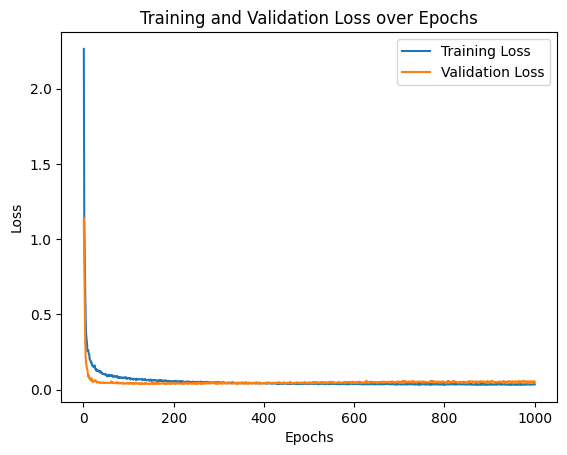

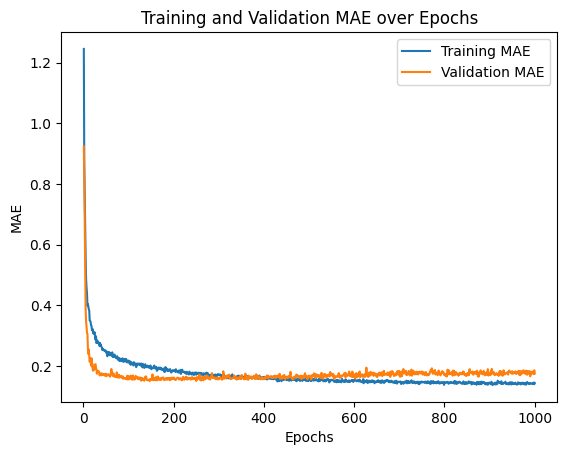

In [389]:
# Your code here
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])

# Data preparation

X = dataset.drop(columns = 'GPA')
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = dataset['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dropout(0.15))
model_2.add(Dense(16, activation = 'relu'))
model_2.add(Dropout(0.05))
model_2.add(Dense(1))


# Model compilation

model_2.compile(optimizer = 'adam', loss ='mse', metrics = ['mae'])

# Fitting the model

history_2 = model_2.fit(X_train, y_train, batch_size = 64, epochs = 1000, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1,1001)
y_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
mae_train = history_2.history['mae']
mae_val = history_2.history['val_mae']

plt.plot(X_epochs, y_loss, label = 'Training Loss')
plt.plot(X_epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()


plt.plot(X_epochs, mae_train, label = 'Training MAE')
plt.plot(X_epochs, mae_val, label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE over Epochs')
plt.show()

In [390]:
# Model evaluation

results_2 = model_2.evaluate(X_test, y_test, batch_size= 32)
results_2

15/15 [==============================] - 0s 1ms/step - loss: 0.0544 - mae: 0.1849


[0.05435023456811905, 0.18491819500923157]

In [391]:
# Model predictions
y_pred_2 = model_2.predict(X_test)
for pred, actual in zip(y_pred_2, y_test):
    print(f"Predicted value: {pred}, Actual value: {actual}")
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"MSE: {mse_2}")
print(f"R^2: {r2_2}")

15/15 [==============================] - 0s 1ms/step
Predicted value: [1.5874571], Actual value: 1.4277243762746905
Predicted value: [3.0423365], Actual value: 3.117354434785501
Predicted value: [1.8458383], Actual value: 2.037768574636005
Predicted value: [3.3508115], Actual value: 3.5485205508668662
Predicted value: [0.6956816], Actual value: 0.2489771312307257
Predicted value: [2.7055492], Actual value: 2.627693905554347
Predicted value: [1.7630965], Actual value: 2.057378500596372
Predicted value: [2.4812167], Actual value: 2.248337588471201
Predicted value: [2.2224634], Actual value: 2.1947065208246226
Predicted value: [0.9907615], Actual value: 0.7581829737450007
Predicted value: [2.7862878], Actual value: 2.370893096932428
Predicted value: [0.87819606], Actual value: 0.7664048694920337
Predicted value: [2.9303102], Actual value: 2.952721567213245
Predicted value: [2.6648388], Actual value: 2.3433313526833226
Predicted value: [2.7196565], Actual value: 2.7718106588704914
Predicte

#### Prediction of the first 5 students

In [392]:
y_2 = model_2.predict(X_test[:5])
y_2

1/1 [==============================] - 0s 23ms/step


array([[1.5874571],
       [3.0423365],
       [1.8458383],
       [3.3508115],
       [0.6956816]], dtype=float32)

#### Model 3:
- Changes:
   - Dataset Data Engineering
    * Used MinMaxScaler instead of Standard.
   

   - Model Definition
    * Changed the architecture : first of all, we start with the input layer, which receives data with 64 unmamspwsmkmwkmkcmits, followed by Batch Normalization, a Leaky ReLU activation with $\alpha = 0.1$, and a Dropout layer of 0.3.Then, we add a 32 units hidden layer, followed by Batch Normalization, another Leaky ReLU activation and a Dropout layer of 0.25. Next, we add a hidden layer of 16 units with a Leaky ReLU activation and a Dropout layer of 0.2. Then we added an additional layer with 8 units, a ReLU activation and a Dropout layer of 0.1. Finally, we then added the output layer of 1 unit with linear activation.
   - Model Compile
    * Nothing changed.
   - Model Training
    * Increased the number of epochs to 150 and adjusted the batch size to 128

In [393]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

Epoch 1/150
12/12 [==============================] - 2s 22ms/step - loss: 1.8359 - mae: 1.1047 - val_loss: 3.8019 - val_mae: 1.7367
Epoch 2/150
12/12 [==============================] - 0s 6ms/step - loss: 1.3007 - mae: 0.9189 - val_loss: 3.5447 - val_mae: 1.6727
Epoch 3/150
12/12 [==============================] - 0s 6ms/step - loss: 1.0856 - mae: 0.8308 - val_loss: 3.3700 - val_mae: 1.6268
Epoch 4/150
12/12 [==============================] - 0s 6ms/step - loss: 0.9472 - mae: 0.7731 - val_loss: 3.1620 - val_mae: 1.5694
Epoch 5/150
12/12 [==============================] - 0s 6ms/step - loss: 0.8296 - mae: 0.7219 - val_loss: 2.9122 - val_mae: 1.4985
Epoch 6/150
12/12 [==============================] - 0s 6ms/step - loss: 0.7803 - mae: 0.7081 - val_loss: 2.7079 - val_mae: 1.4387
Epoch 7/150
12/12 [==============================] - 0s 6ms/step - loss: 0.7521 - mae: 0.6832 - val_loss: 2.5207 - val_mae: 1.3862
Epoch 8/150
12/12 [==============================] - 0s 6ms/step - loss: 0.7091 - 

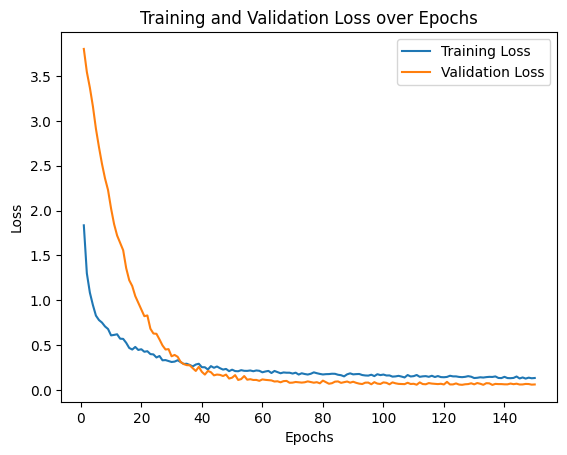

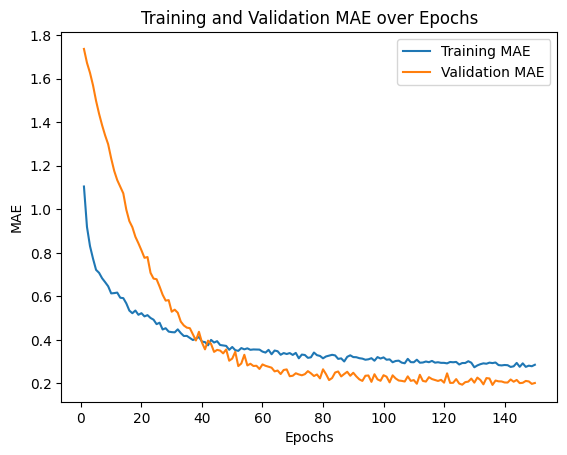

In [394]:
# Your code here
# Your code here
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])

# Data preparation

X = dataset.drop(columns = 'GPA')
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = dataset['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X_train.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.3))

model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.25))

model_3.add(Dense(16))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.2))

model_3.add(Dense(8, activation='relu'))
model_3.add(Dropout(0.1))

model_3.add(Dense(1, activation='linear'))


# Model compilation

model_3.compile(optimizer = 'adam', loss ='mse', metrics = ['mae'])

# Fitting the model

history_3 = model_3.fit(X_train, y_train, batch_size = 128, epochs = 150, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1,151)
y_loss = history_3.history['loss']
val_loss = history_3.history['val_loss']
mae_train = history_3.history['mae']
mae_val = history_3.history['val_mae']

plt.plot(X_epochs, y_loss, label = 'Training Loss')
plt.plot(X_epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()


plt.plot(X_epochs, mae_train, label = 'Training MAE')
plt.plot(X_epochs, mae_val, label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE over Epochs')
plt.show()

In [395]:
# Model evaluation

results_3 = model_3.evaluate(X_test, y_test, batch_size= 32)
results_3

15/15 [==============================] - 0s 1ms/step - loss: 0.0599 - mae: 0.1960


[0.0599215105175972, 0.19596317410469055]

In [402]:
# Model predictions
y_pred_3 = model_3.predict(X_test)
for pred, actual in zip(y_pred_3, y_test):
    print(f"Predicted value: {pred}, Actual value: {actual}")
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print(f"MSE: {mse_3}")
print(f"R^2: {r2_3}")

15/15 [==============================] - 0s 1ms/step
Predicted value: [1.5502312], Actual value: 1.4277243762746905
Predicted value: [2.8037999], Actual value: 3.117354434785501
Predicted value: [1.9102273], Actual value: 2.037768574636005
Predicted value: [3.1294687], Actual value: 3.5485205508668662
Predicted value: [0.48972392], Actual value: 0.2489771312307257
Predicted value: [2.5620348], Actual value: 2.627693905554347
Predicted value: [1.7758906], Actual value: 2.057378500596372
Predicted value: [2.256531], Actual value: 2.248337588471201
Predicted value: [2.148424], Actual value: 2.1947065208246226
Predicted value: [0.9075526], Actual value: 0.7581829737450007
Predicted value: [2.5828404], Actual value: 2.370893096932428
Predicted value: [0.6337227], Actual value: 0.7664048694920337
Predicted value: [2.732776], Actual value: 2.952721567213245
Predicted value: [2.5842903], Actual value: 2.3433313526833226
Predicted value: [2.6487586], Actual value: 2.7718106588704914
Predicted v

#### Prediction of the first 5 studensts

In [405]:
y_3 = model_3.predict(X_test[:5])
y_3

1/1 [==============================] - 0s 23ms/step


array([[1.5502312 ],
       [2.8037999 ],
       [1.9102273 ],
       [3.1294684 ],
       [0.48972392]], dtype=float32)

## Comparing the models


In [406]:
data = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Loss": [history.history['loss'][-1], history_2.history['loss'][-1], history_3.history['loss'][-1]],
    "MAE": [history.history['mae'][-1], history_2.history['mae'][-1], history_3.history['mae'][-1]]
}

df = pd.DataFrame(data)
df

,Model,Loss,MAE
0,Model 1,0.017473,0.104320
1,Model 2,0.034743,0.143779
2,Model 3,0.134369,0.285806


In [407]:
data = {
    "Student": ["1", "2", "3", "4", "5"],
    "Model 1": [y_1[0], y_1[1], y_1[2], y_1[3], y_1[4]],
    "Model 2": [y_2[0], y_2[1], y_2[2], y_2[3], y_2[4]],
    "Model 3": [y_3[0], y_3[1], y_3[2], y_3[3], y_3[4]],
    "Actual value": [y_test.iloc[0], y_test.iloc[1], y_test.iloc[2], y_test.iloc[3], y_test.iloc[4]],

}

df = pd.DataFrame(data)
df

,Student,Model 1,Model 2,Model 3,Actual value
0,1,[1.5037416],[1.5874571],[1.5502312],1.427724
1,2,[3.341662],[3.0423365],[2.8037999],3.117354
2,3,[1.9174018],[1.8458383],[1.9102273],2.037769
3,4,[3.450105],[3.3508115],[3.1294684],3.548521
4,5,[0.44754013],[0.6956816],[0.48972392],0.248977


As it is seen in the previous tables, the model which optimized and minimized the loss function is the model 1. It also obtained the MAE function with the lowest value. Also, we can see every model getting very near the actual GPA the first 5 students obtained.